In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense,Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model

In [ ]:
df_final = pd.read_csv("/content/AAPL 3.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df_final.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100600,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095352,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088353,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090540,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093165,73449600


In [ ]:
df_final.shape

(10309, 6)

In [ ]:
df_final.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10309.000000,10309.000000,10309.000000,10309.000000,10309.000000,1.030900e+04
mean,12.487639,12.619589,12.353815,12.491800,11.903312,3.344702e+08
std,26.316494,26.599819,26.028935,26.327308,26.046125,3.401614e+08
min,0.049665,0.049665,0.049107,0.049107,0.038490,0.000000e+00
25%,0.277902,0.285714,0.271964,0.278393,0.233457,1.266524e+08
50%,0.459821,0.467321,0.450893,0.459821,0.380551,2.227152e+08
75%,13.250714,13.454286,13.045714,13.346429,11.459463,4.162256e+08
max,156.979996,157.259995,154.389999,156.690002,156.690002,7.421641e+09


In [ ]:
df_final.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

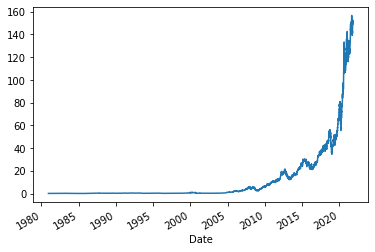

In [ ]:
df_final['Adj Close'].plot()

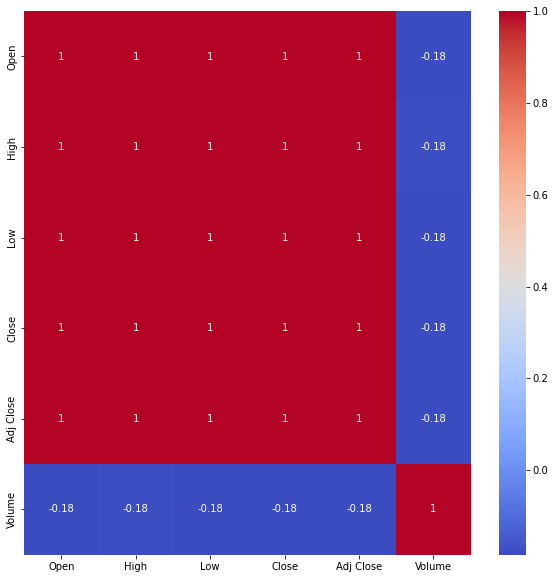

In [ ]:
import seaborn as sns

corr=df_final.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2g')

plt.show()


In the boxplot below, the box extends from the lower to upper quartile values of the data, with a line at the median.
 The whiskers extend from the box to show the range of the data. The triangle indicates the mean value.



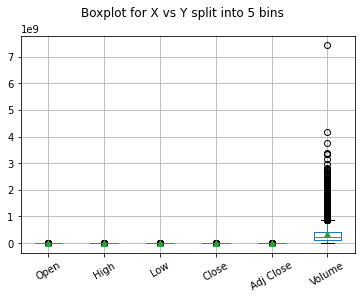

In [ ]:
plt.figure()
plt.suptitle("Boxplot for X vs Y split into 5 bins")
ax = plt.gca()

df_final.boxplot(showmeans=True)
# Rotate x axis text values
for tick in ax.get_xticklabels():
    tick.set_rotation(30)

print("\nIn the boxplot below, the box extends from the lower to upper quartile values of the data, with a line at the median.\n \
The whiskers extend from the box to show the range of the data. The triangle indicates the mean value.\n")

In [ ]:
X=df_final.drop(['Adj Close'],axis=1)
X=X.drop(['Close'],axis=1)

In [ ]:
test = df_final
# Target column
target_adj_close = pd.DataFrame(test['Adj Close'])
display(test.head())

test.shape

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100600,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095352,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088353,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090540,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093165,73449600


(10309, 6)

In [ ]:
# selecting Feature Columns
feature_columns = ['Open', 'High', 'Low', 'Volume']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Volume
Date,,,,
1980-12-12,0.000501,0.000504,0.000513,0.063198
1980-12-15,0.000462,0.000461,0.000470,0.023699
1980-12-16,0.000405,0.000405,0.000412,0.014246
1980-12-17,0.000420,0.000422,0.000430,0.011647
1980-12-18,0.000441,0.000444,0.000452,0.009897


In [ ]:
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value

target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)


Shape of features :  (10309, 4)
Shape of target :  (10309, 1)

 -----After process------ 

Shape of features :  (10219, 4)
Shape of target :  (10219, 1)


In [ ]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()


In [ ]:
X_train.shape

(9290, 4)

In [ ]:
X_test.shape

(929, 4)

In [ ]:
y_train.shape

(9290,)

In [ ]:
y_test.shape

(929,)

# Moving Average


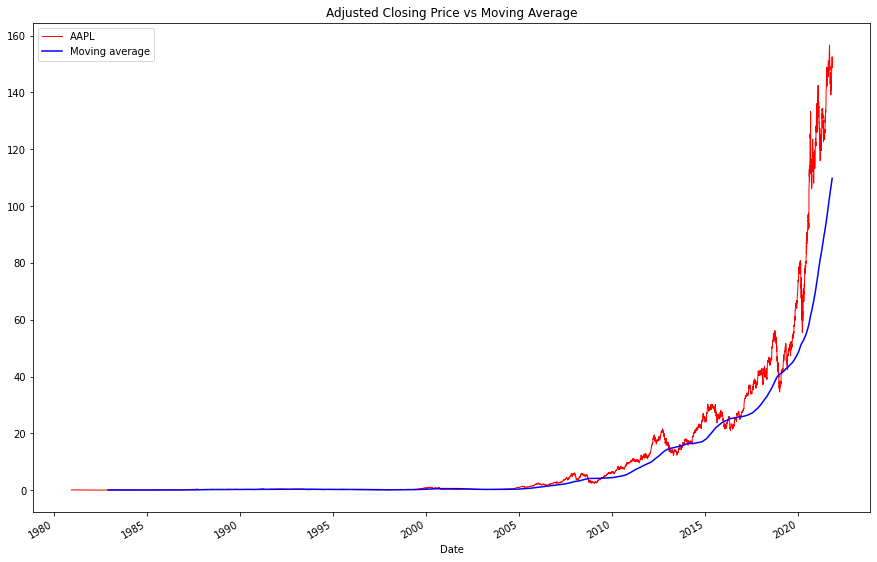

In [ ]:
close_col = df_final['Adj Close']
mvag = close_col.rolling(window=500).mean()     # Taking an average over the window size of 100.
# Increasing the window size can make it more smoother, but less informative and vice-versa.

# Visualizing Rolling Mean and Adjusted Closing Price together

df_final['Adj Close'].plot(label='AAPL', figsize=(15,10), title='Adjusted Closing Price vs Moving Average', color='red', linewidth=1.0, grid=True)
mvag.plot(label='Moving average', color='blue')
plt.legend()


In [ ]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)

    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)

    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

# Linear Regression


RMSE:  12.394092236242727
R2 score:  -6.980771739300346


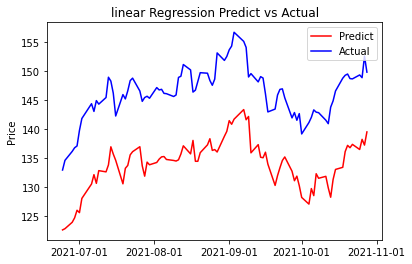

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

validate_result(linear_model,'linear Regression')

# **Decision Tree Regressor**


RMSE:  107.64302304654368
R2 score:  -600.9871402895833


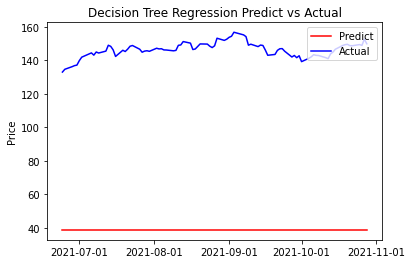

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

dt=dt.fit(X_train, y_train)

validate_result(dt, 'Decision Tree Regression')

# Support Vector Regressor


RMSE:  134.49061314347352
R2 score:  -938.7219885283122


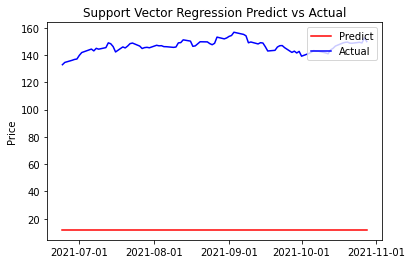

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
validate_result(regressor, 'Support Vector Regression')

# Random Forest Regressor

RMSE:  107.53817468195203
R2 score:  -599.8149950630574


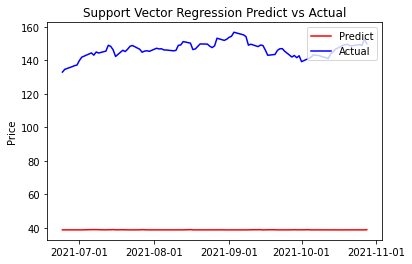

In [ ]:
from sklearn.ensemble import RandomForestRegressor

 # create regressor object
reg = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data
reg.fit(X_train, y_train)
validate_result(reg, 'Random forest Regression')

# **LSTM**

In [ ]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)

history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
1162/1162 [==============================] - 5s 3ms/step - loss: 6.3105
Epoch 2/200
1162/1162 [==============================] - 3s 3ms/step - loss: 36.9048
Epoch 3/200
1162/1162 [==============================] - 3s 3ms/step - loss: 13.3659
Epoch 4/200
1162/1162 [==============================] - 3s 3ms/step - loss: 4.6473
Epoch 5/200
1162/1162 [==============================] - 3s 3ms/step - loss: 1.1768
Epoch 6/200
1162/1162 [==============================] - 3s 3ms/step - loss: 0.2920
Epoch 7/200
1162/1162 [==============================] - 3s 3ms/step - loss: 0.1172
Epoch 8/200
1162/1162 [==============================] - 5s 4ms/step - loss: 0.0722
Epoch 9/200
1162/1162 [==============================] - 4s 4ms/step - loss: 0.0560
Epoch 10/200
1162/1162 [==============================] - 3s 3ms/step - loss: 0.0491
Epoch 11/200
1162/1162 [==============================] - 3s 3ms/step - loss: 0.0465
Epoch 12/200
1162/1162 [==============================] - 3s 3ms/step - 

In [ ]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)

The R2 score on the Train set is:	0.997
The R2 score on the Test set is:	0.926


In [ ]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)


RSME_score = np.sqrt(mean_squared_error(y_test, y_pred_test_LSTM))
print('RMSE: ', RSME_score)

R2_score = r2_score(y_test, y_pred_test_LSTM)
print('R2 score: ', R2_score)

RMSE:  8.920283699582708
R2 score:  0.9257765768406393


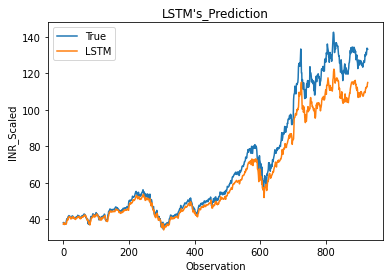

In [ ]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

In [ ]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)
y_pred_test_LSTM

array([[ 37.401764],
       [ 37.786514],
       [ 38.114956],
       [ 38.178913],
       [ 37.248997],
       [ 37.38782 ],
       [ 37.368454],
       [ 37.36255 ],
       [ 37.34062 ],
       [ 37.508465],
       [ 38.22854 ],
       [ 39.28934 ],
       [ 39.950714],
       [ 40.012375],
       [ 39.63716 ],
       [ 41.034973],
       [ 41.046097],
       [ 41.3279  ],
       [ 41.512634],
       [ 41.437767],
       [ 41.47242 ],
       [ 41.232883],
       [ 40.94469 ],
       [ 40.26548 ],
       [ 40.62307 ],
       [ 40.527157],
       [ 40.40924 ],
       [ 40.772095],
       [ 41.226856],
       [ 41.52053 ],
       [ 41.37829 ],
       [ 41.191082],
       [ 40.54904 ],
       [ 40.43192 ],
       [ 40.367958],
       [ 40.712875],
       [ 40.297813],
       [ 39.935562],
       [ 40.252533],
       [ 40.39406 ],
       [ 40.43631 ],
       [ 40.824272],
       [ 40.975002],
       [ 40.91266 ],
       [ 41.122673],
       [ 41.63786 ],
       [ 41.451683],
       [ 41.3